<a href="https://colab.research.google.com/github/manojmandal27/DecisionTree/blob/main/NLP_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages Installation

In [10]:
#!pip install nltk
#!pip install spacy

In [11]:
import pandas as pd
import nltk
import spacy
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

# Data Importing

In [12]:
twitter_data=pd.read_csv("https://github.com/manojmandal27/NLP_Classical_ML/raw/main/Twitter_Sentiment_Data.csv")
twitter_data.sample(10)

,tweet_ID,raw_tweet,sentiment_label
19200,9e3b470a70,is it unny today or not? taking too long to de...,neutral
19577,787a0ada33,All moved in to our new apartment. So exciting,positive
19268,f588e1ef01,Hi-5 to ALL my friends and ummm thanks for the...,positive
22104,941dd6b5bc,yea i know right! i love that song!,positive
22391,01e1f59fac,cant believe i stay out this late!.....waking ...,negative
5832,a357e314cd,I`m sooo lost without my car This is truly de...,negative
4855,948ed8cc72,"never. smh, I don`t own flats lol",neutral
21328,4464eaa598,YO I`m just on the computer,neutral
8378,de4f438f70,_fr Yes I saw the Village but the restaurant i...,neutral
540,9843ecd416,"Aw, not going to Toronto anymore.",negative


#Lower Case conversion

In [13]:
twitter_data["tweet_lowcase"]=twitter_data["raw_tweet"].apply(lambda x:str(x).lower())
twitter_data.sample(10)

,tweet_ID,raw_tweet,sentiment_label,tweet_lowcase
16640,befa0ac78c,-was just told by Dan to NOT say anything anym...,negative,-was just told by dan to not say anything anym...
8070,ef32edfd19,"My nose is runny, my head is pounding, and tee...",negative,"my nose is runny, my head is pounding, and tee..."
244,9bef0d7135,was that sass I detect? As long as it isn`t ...,neutral,was that sass i detect? as long as it isn`t ...
26981,92e87e7fac,it`s raining..,neutral,it`s raining..
23844,305a3f696e,u don`t know harajuku lovers?,neutral,u don`t know harajuku lovers?
3585,787dadc2fd,looking forward to your mandarin album. Hope...,positive,looking forward to your mandarin album. hope...
23545,86e9e53b66,yea dude... 5`8'! really!?,neutral,yea dude... 5`8'! really!?
2567,c6b8ff0b6e,Wedding..,neutral,wedding..
15799,e0aec9293a,um... so I don`t think my text msgs have a 'su...,negative,um... so i don`t think my text msgs have a 'su...
16795,413de9fc40,sweaty and tired from the 6 lap run. gonna do...,negative,sweaty and tired from the 6 lap run. gonna do...


#Tokenizing

In [14]:
from nltk.tokenize import word_tokenize
twitter_data["word_tokens"] = twitter_data["tweet_lowcase"].apply(lambda x:word_tokenize(str(x)))
#lambda function to apply on all rows
#str() function to avoid numeric and other errors
twitter_data[["raw_tweet","word_tokens"]].sample(10)

,raw_tweet,word_tokens
7384,FacePanda is cool,"[facepanda, is, cool]"
16876,Im @ the dentist ....scary people here...,"[im, @, the, dentist, ...., scary, people, her..."
15637,I don`t feel good,"[i, don, `, t, feel, good]"
13541,oh my. i have to play cluedo.,"[oh, my, ., i, have, to, play, cluedo, .]"
18315,ha I think I got like two hours of sleep last...,"[ha, i, think, i, got, like, two, hours, of, s..."
781,just had a great talk with grace about how awe...,"[just, had, a, great, talk, with, grace, about..."
25519,go into an anti-gravity chamber then you can ...,"[go, into, an, anti-gravity, chamber, then, yo..."
9216,can i have some followers :` ( ... i`m so sad....,"[can, i, have, some, followers, :, `, (, ..., ..."
22223,"Hi, my name is Kate and I`m addicted to mm`s!","[hi, ,, my, name, is, kate, and, i, `, m, addi..."
21317,really? I hate the mobile twitter..its hard t...,"[really, ?, i, hate, the, mobile, twitter, ..,..."


In [15]:
twitter_data[["raw_tweet","word_tokens"]].sample(10)

,raw_tweet,word_tokens
4269,really wants to go see AI tonight.,"[really, wants, to, go, see, ai, tonight, .]"
11705,"AmmoxXx great day? Woman, did you NOTICE the s...","[ammoxxx, great, day, ?, woman, ,, did, you, n..."
11578,time for bed up in 6 hours,"[time, for, bed, up, in, 6, hours]"
21250,but yeah i like purple maybe thats why!! ;) ...,"[but, yeah, i, like, purple, maybe, thats, why..."
22128,Thanks! I`m making homemade lasagna for my ...,"[thanks, !, i, `, m, making, homemade, lasagna..."
3405,if u can smell goodness all around you and en...,"[if, u, can, smell, goodness, all, around, you..."
24365,"feels very, very rough!","[feels, very, ,, very, rough, !]"
10507,you don`t love me anymore!,"[you, don, `, t, love, me, anymore, !]"
19339,Adding Comments for my friends want sum?,"[adding, comments, for, my, friends, want, sum..."
12537,Snap. I`m the same with any reality show. Wat...,"[snap, ., i, `, m, the, same, with, any, reali..."


# Expanding shortforms

In [16]:
contra_Expan_Dict = {"ain`t": "am not","aren`t": "are not","can`t": "cannot","can`t`ve": "cannot have","`cause": "because",
"could`ve": "could have","couldn`t": "could not","couldn`t`ve": "could not have","didn`t": "did not",
"doesn`t": "does not","don`t": "do not","hadn`t": "had not","hadn`t`ve": "had not have","hasn`t": "has not",
"haven`t": "have not","he`d": "he would","he`d`ve": "he would have","he`ll": "he will","he`ll`ve": "he will have",
"he`s": "he is","how`d": "how did","how`d`y": "how do you","how`ll": "how will",
"how`s": "how does","i`d": "i would","i`d`ve": "i would have","i`ll": "i will","i`ll`ve": "i will have","i`m": "i am",
"i`ve": "i have","isn`t": "is not","it`d": "it would","it`d`ve": "it would have","it`ll": "it will","it`ll`ve": "it will have",
"it`s": "it is","let`s": "let us","ma`am": "madam","mayn`t": "may not","might`ve": "might have","mightn`t": "might not",
"mightn`t`ve": "might not have","must`ve": "must have","mustn`t": "must not","mustn`t`ve": "must not have","needn`t": "need not","needn`t`ve": "need not have",
"o`clock": "of the clock","oughtn`t": "ought not","oughtn`t`ve": "ought not have","shan`t": "shall not",
"sha`n`t": "shall not","shan`t`ve": "shall not have","she`d": "she would",
"she`d`ve": "she would have","she`ll": "she will","she`ll`ve": "she will have",
"she`s": "she is","should`ve": "should have","shouldn`t": "should not","shouldn`t`ve": "should not have","so`ve": "so have","so`s": "so is",
"that`d": "that would","that`d`ve": "that would have","that`s": "that is","there`d": "there would","there`d`ve": "there would have","there`s": "there is",
"they`d": "they would","they`d`ve": "they would have","they`ll": "they will","they`ll`ve": "they will have","they`re": "they are","they`ve": "they have",
"to`ve": "to have","wasn`t": "was not"," u ": " you "," ur ": " your "," n ": " and ","won`t": "would not",
"dis": "this","bak": "back","brng": "bring"}

In [17]:
def expanded_form(x):
  if x in contra_Expan_Dict.keys():
    return(contra_Expan_Dict[x])
  else:
    return(x)

In [18]:
x=str(twitter_data["tweet_lowcase"][6207])
print("original tweet ==>", x)
x=x.split()
print("Expanded form ==>",[expanded_form(t) for t in x])

original tweet ==>  it`s under a honeymoon by the good life
Expanded form ==> ['it is', 'under', 'a', 'honeymoon', 'by', 'the', 'good', 'life']


In [19]:
twitter_data["tweet_expanded"]=twitter_data["tweet_lowcase"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
twitter_data[["raw_tweet","tweet_expanded"]].sample(10)

,raw_tweet,tweet_expanded
3055,Goingg to school today,"[goingg, to, school, today]"
2605,going thru bills,"[going, thru, bills]"
22088,_II I have no choice have to get on it!,"[_ii, i, have, no, choice, have, to, get, on, ..."
4351,it`s because finished the recordings?,"[it is, because, finished, the, recordings?]"
25369,getting my new cellphone on wednesday! the LG ...,"[getting, my, new, cellphone, on, wednesday!, ..."
14816,Heading to Beaumont,"[heading, to, beaumont]"
7505,ive burned like a ginger kid in the sun. now m...,"[ive, burned, like, a, ginger, kid, in, the, s..."
454,Still jealous,"[still, jealous]"
11612,likes the reports from testers of his new pack...,"[likes, the, reports, from, testers, of, his, ..."
7622,Hi Miss. Isabelle here. :],"[hi, miss., isabelle, here., :]]"


In [20]:
twitter_data[["raw_tweet","tweet_expanded"]].sample(10)

,raw_tweet,tweet_expanded
21936,"HEY! aww man, no, i didnt IGNORE YOU i just d...","[hey!, aww, man,, no,, i, didnt, ignore, you, ..."
20127,_Cupcake I think only 23. I get confused easy...,"[_cupcake, i, think, only, 23., i, get, confus..."
13696,I knew something was wrong with this guy. No...,"[i, knew, something, was, wrong, with, this, g..."
24832,My class will be at Chem Sc building. Will s...,"[my, class, will, be, at, chem, sc, building.,..."
12505,Played with FontStruct http://is.gd/ejE upload...,"[played, with, fontstruct, http://is.gd/eje, u..."
4720,"**** straight you know what the game is, and ...","[****, straight, you, know, what, the, game, i..."
1901,oh gaha no of course i wasn`t offended why wo...,"[oh, gaha, no, of, course, i, was not, offende..."
23861,I want some pineapple! I miss my baby,"[i, want, some, pineapple!, i, miss, my, baby]"
5620,is online shopping...fantastic,"[is, online, shopping...fantastic]"
26207,Oh come on!!! You get next week off and I get...,"[oh, come, on!!!, you, get, next, week, off, a..."


# Stopwords Removal

## NLTK Stopwords

In [21]:
from nltk.corpus import stopwords
nltk_stop_words = set(stopwords.words('english')) ##Selecting the stop words from the Language
print("Number of Stop words in NLTK ==>", len(nltk_stop_words))
print(sorted(nltk_stop_words))

Number of Stop words in NLTK ==> 179
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 

## spaCy Stopwords

In [22]:
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
print("Number of Stop words in spaCy ==>", len(spacy_stopwords))
print(sorted(spacy_stopwords))
#Spacy stopwords list looks better.

Number of Stop words in spaCy ==> 326
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'ha

In [23]:
x= ['i', 'saw', 'it', 'the', 'moive', 'is', 'pathetic']
print("original tweet ==>", x)
print("After Removing Stopwords ==>",[t for t in x if t not in spacy_stopwords])

original tweet ==> ['i', 'saw', 'it', 'the', 'moive', 'is', 'pathetic']
After Removing Stopwords ==> ['saw', 'moive', 'pathetic']


In [24]:
twitter_data["After_Removing_Stopwords"] = twitter_data["tweet_expanded"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
twitter_data[["raw_tweet","After_Removing_Stopwords"]].sample(10)

,raw_tweet,After_Removing_Stopwords
1477,oh yeah,"[oh, yeah]"
21405,; Re: Home - that`s exactly what I meant... ho...,"[;, re:, home, -, that is, exactly, meant..., ..."
19231,he killed everyone for nothing. :o :-ss,"[killed, nothing., :o, :-ss]"
22168,"Yeah im following you, Hun! Goodnight","[yeah, im, following, you,, hun!, goodnight]"
15086,i wish i was still in my jams,"[wish, jams]"
12897,Aww man. arrived. How-To Guide-less,"[aww, man., arrived., how-to, guide-less]"
1270,Were have you been?,[been?]
26719,It baffles me how much Radio Shack isn`t the s...,"[baffles, radio, shack, is not, radio, shack, ..."
18865,i incredily love reading your tweets! they`re...,"[incredily, love, reading, tweets!, they are, ..."
10645,"Yes, that does sound like a distinct advantag...","[yes,, sound, like, distinct, advantage., fort..."


## Add Custom Stowords

In [25]:
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do"})
print("New Number of Stop words in spaCy ==>", len(spacy_stopwords))
print(sorted(spacy_stopwords))

New Number of Stop words in spaCy ==> 331
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'ha', 'had', 

In [26]:
twitter_data["After_Removing_Stopwords"] = twitter_data["tweet_expanded"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
twitter_data[["raw_tweet","After_Removing_Stopwords"]].sample(10)

,raw_tweet,After_Removing_Stopwords
6992,Fun at the water park then dinner at the rainf...,"[fun, water, park, dinner, rainforest, cafe, (..."
3456,ten update away from 2000 whooo hoooo budden!,"[update, away, 2000, whooo, hoooo, budden!]"
10036,"hey thought ud be on here most likely, im str...","[hey, thought, ud, likely,, im, stressed, dont..."
156,me neither,[]
13074,pictures of your bliss? In JPEG format? Sor...,"[pictures, bliss?, jpeg, format?, sorry,, it i..."
1762,yesh and that potato guy is online... but hes...,"[yesh, potato, guy, online..., hes, live]"
21375,Im good ta. bit tired cos i`ve been wking al...,"[im, good, ta., bit, tired, cos, i have, wking..."
3943,my dad just bought me both of these they`re ...,"[dad, bought, they are, tricky, language, tho]"
110,if u have a friendster add me!!!!!!!!! ...,"[u, friendster, add, me!!!!!!!!!, email, adres..."
5454,my knee hurts!,"[knee, hurts!]"


#Regular Expression

In [27]:
def clean_with_re(x):
  x=str(x)
  x=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ", x) #Remove URLs
  x=re.sub(r'[^\w ]+', "", x) # Remove Punctuation-1
  x=re.sub(r"[,!@&\'?\.$%_]"," ", x) # Remove Punctuation-2
  x=re.sub(r"\d+"," ", x) #Remove digits
  return(x)

In [28]:
import re
twitter_data["tweet_cleaned_Regex"]=twitter_data["After_Removing_Stopwords"].apply(lambda x:clean_with_re(x))
twitter_data[["raw_tweet","tweet_cleaned_Regex"]].sample(10)

,raw_tweet,tweet_cleaned_Regex
23383,just stop talking if ur gonna be that mean,stop talking ur gonna mean
1236,Glad to see the sun out in Dublin after a grea...,glad sun dublin great week london work
18816,Hey Talinda How Tyler slept this night? My n...,hey talinda tyler slept night nephew yrs old...
24914,"it`s looking bright, so I think the sun will...",it is looking bright think sun appearance gues...
7268,http://twitpic.com/4vp3x - *swoon* Nick looks...,swoon nick looks cute faints
13494,Up was sooo gooooood. Wood ranch bbq time! Dia...,sooo gooooood wood ranch bbq time dian deng pao
19538,"Hahaha yes dey dooo, BOSTON Legal tha fat ol...",hahaha yes dey dooo boston legal tha fat old m...
21236,i`ve heard Basment Jaxx`s new song 'Raindrops'...,i have heard basment jaxxs new song raindropst...
6132,Can`t wait 4 a real bed! haha,wait real bed haha
13572,**** im so bummed out right now....nobody love...,im bummed right nownobody loves


In [29]:
twitter_data[["After_Removing_Stopwords","tweet_cleaned_Regex"]].sample(10)

,After_Removing_Stopwords,tweet_cleaned_Regex
8822,"[wild, oats, pinot, grigio, =, v, easy, drink]",wild oats pinot grigio v easy drink
1680,"[find, mondays, busiest, days., come, work,, 1...",find mondays busiest days come work things c...
24647,"[planet, fitness, van, wyck,, hearing, homies,...",planet fitness van wyck hearing homies tell bo...
15518,"[love, pink,, do not, care., today, shall, twe...",love pink do not care today shall tweet hardco...
14442,"[@_shutupandsmile, ow, .., avatar,, boyfriend,...",shutupandsmile ow avatar boyfriend lying bed it
5108,"[good, morning, you., hope, nice, productive, ...",good morning you hope nice productive day
16014,"[awake, 19, hours]",awake hours
2355,"[london, catching, tv, sleeping, day!]",london catching tv sleeping day
6305,"[getting, ready, study, outside, having, fun, ...",getting ready study outside having fun nice su...
18090,"[it!, chinese, sounds, yum!]",it chinese sounds yum


#Spelling Correction

In [30]:
#!pip install textblob
#!python textblob.download_corpora

In [31]:
from textblob import TextBlob
sample_tweet="What an grat and amazimg week. I am excited to learn data scienec"
corrected_tweet=TextBlob(sample_tweet).correct()
corrected_tweet

TextBlob("That an great and amazing week. I am excited to learn data science")

#Lemmatization

In [32]:
spacy_model = spacy.load('en_core_web_sm')

In [33]:
sample_tweet=twitter_data["tweet_cleaned_Regex"][0]
print("Original Text ==>", sample_tweet)
print("Lemmatization Results ==>", " ".join([t.lemma_ for t in spacy_model(str(sample_tweet))]))
#print("Lemmatization PRON removed ==>", " ".join([t.lemma_ for t in spacy_model(str(sample_tweet)) if t.lemma_ !="-PRON-" ]))

Original Text ==> i would responded going
Lemmatization Results ==> I would respond go


In [34]:
twitter_data["Lemmatized_tweet"] = twitter_data["tweet_cleaned_Regex"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
twitter_data[["raw_tweet","Lemmatized_tweet"]].sample(10)

,raw_tweet,Lemmatized_tweet
21986,_violence heyyyy babyy,violence heyyyy babyy
23783,That comment was just to ..well you know...to...,comment well knowto reply it
22428,I`m with you...been up till 5-6 for the last ...,I be youbeen till night
504,but it all went too quick and there wasn`t a ...,go quick be not chance
19986,just got in. I have the best friends,get in good friend
3530,dont cry for me! i will see u tomorrow. muah.,do not cry I u tomorrow muah
25861,I *really* want to go to the concert tomorrow!!,really want concert tomorrow
18720,Are you in Galbladia Garden? That **** is hard.,galbladia garden hard
10798,"Alright, sorry. But I think you should go any...",alright sorry think anyways
6289,",:Mother, Happy Mother`s Day.... and to all Mo...",mother happy mother day mom there god bless yh...


In [35]:
#Few more samples
twitter_data[["raw_tweet","Lemmatized_tweet"]].sample(10)

,raw_tweet,Lemmatized_tweet
5941,Yeah I hate that too!!!! Sorry ur goin thru that,yeah hate too sorry ur goin
7215,is watching neighbours!,watch neighbour
13926,No I haven`t had chance to watch that yet...g...,have not chance watch yetgoe hold it thank tip
9400,I`m currently into Emarosa. Their new album i...,I be currently emarosa new album shiiiiiiiiiii...
14529,Whooops... wrong smiley... it`s supposed to be...,whooop wrong smiley it be suppose
18370,"want my new lappytop now, but the site says it...",want new lappytop now site say would not till
21158,I have softball,softball
6473,Sweet deal! I so want to see that movie! Meth...,sweet deal want movie methink star trek movie ...
26993,love new shoes thanks wine lo,love new shoe thank wine lo
20451,I really want to be a star...Hope Flawless wil...,want starhope flawless work


#Any Further Cleaning

In [36]:
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do"})
twitter_data["Final_Cleaned_Tweet"] = twitter_data["Lemmatized_tweet"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
twitter_data["Final_Cleaned_Tweet_tokens"]=twitter_data["Final_Cleaned_Tweet"].apply(lambda x: " ".join(x) )
twitter_data[["raw_tweet","Final_Cleaned_Tweet_tokens"]].sample(10)

,raw_tweet,Final_Cleaned_Tweet_tokens
17926,lol very much appreciated!!! so excited!!!,appreciate excited
15096,"seriously underrated.. `porridge`, the best br...",seriously underrated porridge good breakfast w...
19436,nooooooo!! not the receipt!! don`t break my ...,nooooooo receipt break heart
20666,_ILL I <3 my blackberry,ill blackberry
23809,"that was flippin` sweet, dudes. thanks for ...",flippin sweet dude thank share
1699,wants to greet all the mom`s out there a Happy...,want greet mom happy mother day enjoy day
12632,"As much as I loved Texas, my dislike for need...",love texas dislike needle interfere
15394,"wow, almost got involved in this big fight at ...",wow involve big fight school ah anyways text I...
16780,save me--i feel like i`m going crazy. ? http:...,save mei feel I crazy z
3026,hmmm they are on offer in Tesco as well but I...,hmmm offer tesco think wee stock


# Word Cloud

In [40]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
final_text="".join(twitter_data["Final_Cleaned_Tweet_tokens"])
len(final_text)

932583

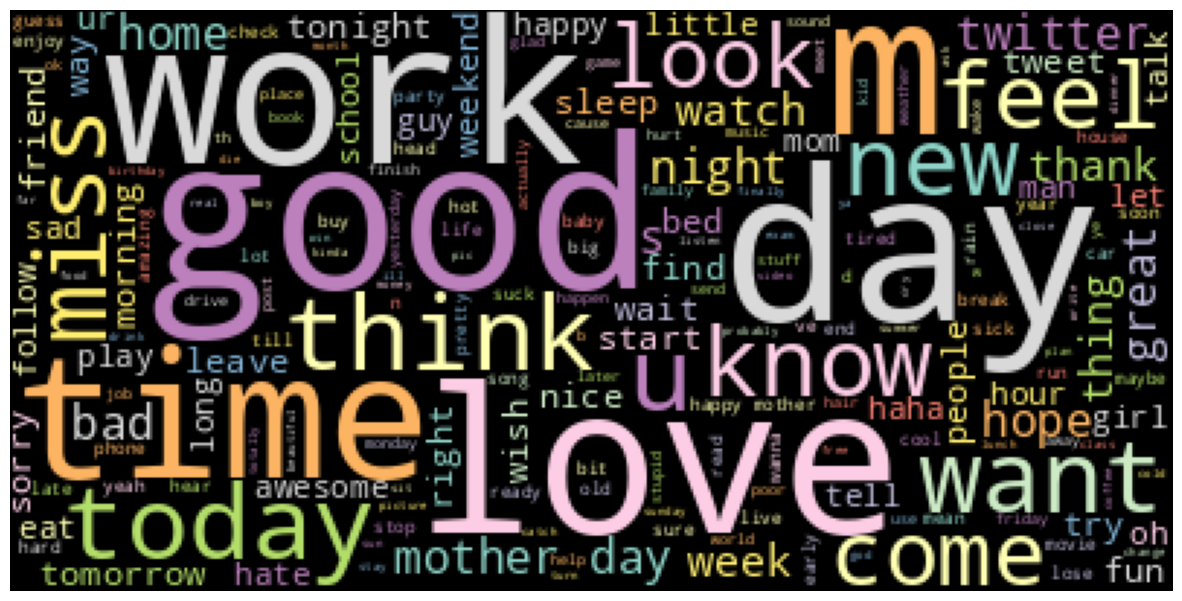

In [42]:
plt.figure(figsize = (15, 15), facecolor = None)
wc=WordCloud(colormap='Set3').generate(final_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

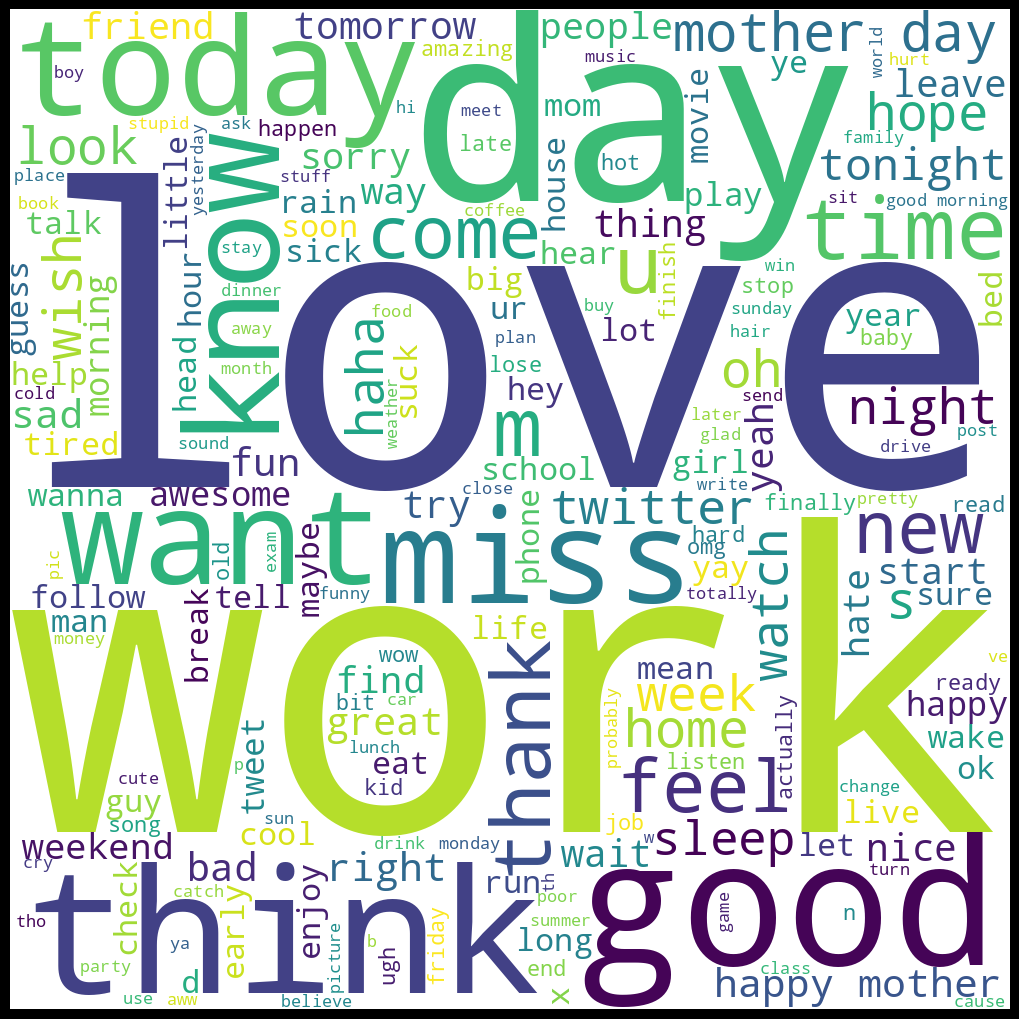

In [43]:
wc = WordCloud(background_color='white', width=1000, height=1000, margin=2).generate(" ".join(twitter_data["Final_Cleaned_Tweet_tokens"]))
plt.figure(figsize=(10, 10), facecolor='k', edgecolor='k')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


# A Single function for pre-processing

In [44]:
def pre_processing(input_data, text_col):
  input_data["text_col_clean"]=input_data[text_col].apply(lambda x:str(x).lower())
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:clean_with_re(x))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x: " ".join(x) )
  print(input_data[[text_col,"text_col_clean"]])

In [45]:
pre_processing(input_data=twitter_data, text_col="raw_tweet")

                                               raw_tweet  \
0                    I`d have responded, if I were going   
1          Sooo SAD I will miss you here in San Diego!!!   
2                              my boss is bullying me...   
3                         what interview! leave me alone   
4       Sons of ****, why couldn`t they put them on t...   
...                                                  ...   
27476   wish we could come see u on Denver  husband l...   
27477   I`ve wondered about rake to.  The client has ...   
27478   Yay good for both of you. Enjoy the break - y...   
27479                         But it was worth it  ****.   
27480     All this flirting going on - The ATG smiles...   

                                          text_col_clean  
0                                              I respond  
1                                sooo sad miss san diego  
2                                           boss bully I  
3                                        in

# Document Term Matrix

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df= 5) #minimum word freq=5
dtm_v1 = pd.DataFrame(countvec1.fit_transform(twitter_data['Final_Cleaned_Tweet_tokens']).toarray(), columns=countvec1.get_feature_names_out(), index=None)
print(dtm_v1.shape)
dtm_v1


(27481, 3468)


,aaaah,aah,abandon,ability,abit,able,absolutely,abt,ac,academy,...,yum,yummy,yup,zac,zealand,zero,zombie,zone,zoo,ï½
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Sentiment Analysis
Features, Target, Train and Test Data

In [48]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_ID                    27481 non-null  object
 1   raw_tweet                   27480 non-null  object
 2   sentiment_label             27481 non-null  object
 3   tweet_lowcase               27481 non-null  object
 4   word_tokens                 27481 non-null  object
 5   tweet_expanded              27481 non-null  object
 6   After_Removing_Stopwords    27481 non-null  object
 7   tweet_cleaned_Regex         27481 non-null  object
 8   Lemmatized_tweet            27481 non-null  object
 9   Final_Cleaned_Tweet         27481 non-null  object
 10  Final_Cleaned_Tweet_tokens  27481 non-null  object
 11  text_col_clean              27481 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [49]:
twitter_data['sentiment_label'].value_counts()

,count
sentiment_label,
neutral,11118
positive,8582
negative,7781


In [50]:
dtm_v1['sentiment_label']=twitter_data['sentiment_label']

#remove neutrals
dtm_v1=dtm_v1[dtm_v1['sentiment_label'] != "neutral"]
print(dtm_v1['sentiment_label'].value_counts())

sentiment_label
positive    8582
negative    7781
Name: count, dtype: int64


In [51]:
from sklearn.model_selection import train_test_split

X=dtm_v1.drop(['sentiment_label'], axis=1)
y=dtm_v1['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13090, 3468)
(13090,)
(3273, 3468)
(3273,)


# Naive Bayes Model

In [52]:
from sklearn.naive_bayes import MultinomialNB
senti_model = MultinomialNB()
#Fitting model to our data
senti_model.fit(X_train, y_train)

MultinomialNB()

In [53]:
print("Train Accuracy", senti_model.score(X_train,y_train))
print("Test Accuracy", senti_model.score(X_test,y_test))

Train Accuracy 0.8888464476699771
Test Accuracy 0.8493736633058356


In [54]:
#Prediction
pred_sentiment=senti_model.predict(X_test)
print(pred_sentiment)

['positive' 'positive' 'positive' ... 'negative' 'positive' 'negative']


# Using the model for predicting for new data points

In [56]:
t1 ="Awesome meeting. Great to be a part of it"
t2 ="The weather is very bad. I would like not to go outside as soon as possible"
tweet_list=[t1,t2]

In [57]:
new_comment= pd.DataFrame({"text":tweet_list})

#Spelling Correction
from textblob import TextBlob
new_comment["text_corrected"]=new_comment["text"].apply(lambda x:"".join(TextBlob(x).correct()))
pre_processing(input_data=new_comment, text_col="text_corrected")

                                      text_corrected  \
0          Awesome meeting. Great to be a part of it   
1  The weather is very bad. I would like not to g...   

                      text_col_clean  
0              awesome meeting great  
1  weather bad outside soon possible  


In [58]:
countvec = CountVectorizer()
dtm_newcomment = pd.DataFrame(countvec.fit_transform(new_comment['text_col_clean']).toarray(), columns=countvec.get_feature_names_out(), index=None)
#print(dtm_newcomment)

dtm_v2=dtm_v1.drop(["sentiment_label"],axis=1)
dtm_newcomment_final=pd.DataFrame(columns=dtm_v2.columns.values)
dtm_newcomment_final=pd.concat([dtm_newcomment_final, dtm_newcomment])
dtm_newcomment_final=dtm_newcomment_final.fillna(0)

In [59]:
print("****Make sure that New DTM and old DTM have same number of columns***")
print("New DTM Shape", dtm_newcomment_final.shape)
print("Overall DTM Shape",dtm_v2.shape)

New_words=[t for t in dtm_newcomment_final.columns.values if t not in dtm_v2.columns.values]
print("Count of new words =>", len(New_words))
print("New words are => ", New_words)

****Make sure that New DTM and old DTM have same number of columns***
New DTM Shape (2, 3468)
Overall DTM Shape (16363, 3468)
Count of new words => 0
New words are =>  []


In [62]:
result=pd.DataFrame()
result["text"]=new_comment["text"]
result["Sentiment"] = senti_model.predict(dtm_newcomment_final)
print(result)

                                                text Sentiment
0          Awesome meeting. Great to be a part of it  positive
1  The weather is very bad. I would like not to g...  negative


In [63]:
!pip install gradio

# Using Gradio and bert LLM to build sentiment analysis

In [66]:
import gradio as gr
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

def analyze_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label'], result['score']

# Create the Gradio interface
iface = gr.Interface(
    fn=analyze_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter text here..."),
    outputs=[gr.Label(label="Sentiment"), gr.Label(label="Confidence Score")],
    title="Sentiment Analysis",
    description="Enter a piece of text to analyze its sentiment."
)

# Launch the Gradio app
iface.launch()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://81baa4517c4818dc44.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
